# Demonstration of ``seismicTools.py`` functionality

TODO

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

import elastic_database as edb
import seismic_tools as st

## Weak (Thomsen) and Anderson polar anisotropy models

TODO

In [2]:
chl = edb.chlorite()
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Elastic Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Calculated average properties:
Bulk Modulus (GPa) → VRH, (Reuss, Voigt)
82.553, (79.883, 85.222)

Shear Modulus (GPa) → VRH, (Reuss, Voigt)
45.772, (39.751, 51.793)

Isotropic Poisson Ratio → VRH, (Reuss, Voigt)
0.266, (0.287, 0.247))

Pugh's ratio → VRH, (Reuss, Voigt)
(1.804, (2.010, 1.645)

Anisotropy indexes
Universal Elastic Anisotropy: 1.581
Kube's Anisotropy Index (proportional): 0.595

Isotropic seismic properties → VRH, (Reuss, Voigt)
Vp (km/s): 7.527, (7.242, 7.803)
Vs (km/s): 4.250, (3.961, 4.521)
Vp/Vs: 1.771, 

In [3]:
model = st.weak_polar_anisotropy(chl)
model2 = st.polar_anisotropy(chl)

In [4]:
model

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.024997,0.000000,7.300158,3.115544,3.111238
2,0.025492,3.883222,7.300096,3.115788,3.111311
3,0.025978,1.483259,7.300035,3.116033,3.111383
4,0.026454,5.366481,7.299973,3.116277,3.111456
...,...,...,...,...,...
79995,1.570740,0.068462,8.996070,3.109423,6.015781
79996,1.570753,3.951684,8.996070,3.109423,6.015781
79997,1.570765,1.551721,8.996070,3.109423,6.015781
79998,1.570778,5.434943,8.996070,3.109423,6.015781


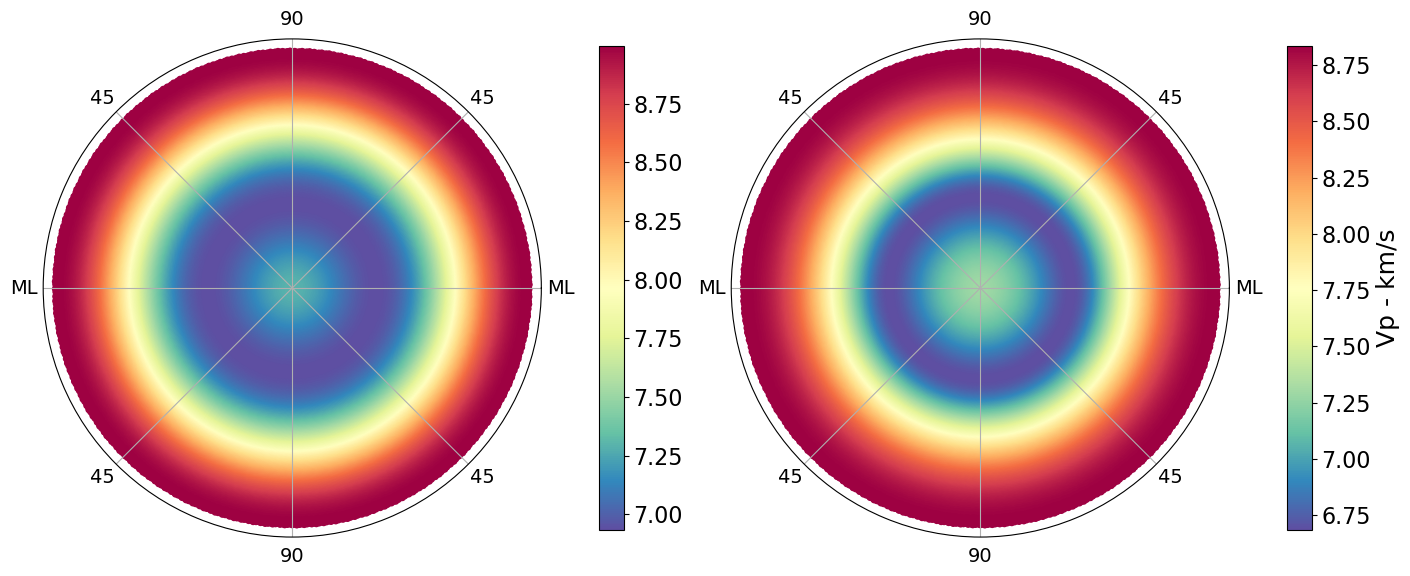

In [5]:
fig, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
#cbar.set_label('Vp (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model2['azimuthal_ang'],
                model2['polar_ang'],
                c=model2['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vp - km/s', fontsize=18)
cbar.ax.tick_params(labelsize=16)

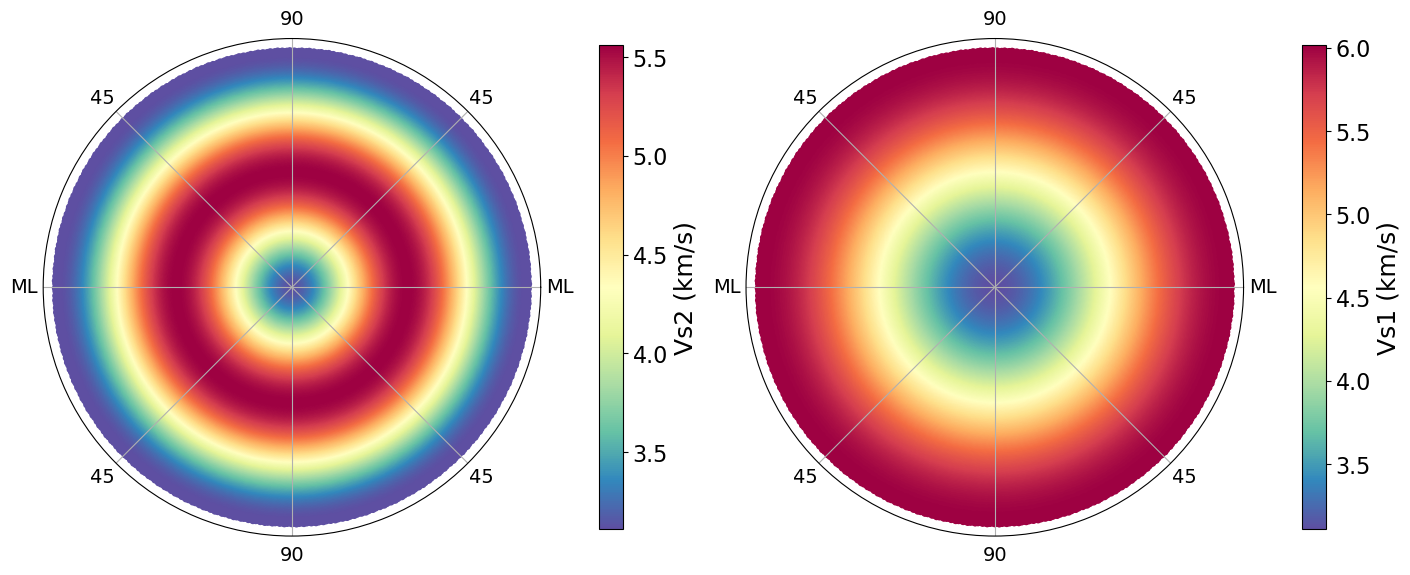

In [6]:
fig2, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# VS2 (slow)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsv'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# VS1 (fast)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vsh'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

---

## Some test

TODO

In [7]:
# load test data
Cij = np.array([[118.8,  53.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8, 118.8,  53.8,   0. ,   0. ,   0. ],
                [ 53.8,  53.8, 118.8,   0. ,   0. ,   0. ],
                [  0. ,   0. ,   0. ,  59.4,   0. ,   0. ],
                [  0. ,   0. ,   0. ,   0. ,  59.4,   0. ],
                [  0. ,   0. ,   0. ,   0. ,   0. ,  59.4]])

density = 5.307

In [8]:
scaling_factor = 1 / density

In [9]:
Cijkl = st._rearrange_tensor(Cij)
Cijkl.shape

(3, 3, 3, 3)

In [10]:
M = st._christoffel_matrix(wave_vector=np.array([1,0,0]), Cijkl=Cijkl)
M = M * scaling_factor
M

array([[22.38552855,  0.        ,  0.        ],
       [ 0.        , 11.19276427,  0.        ],
       [ 0.        ,  0.        , 11.19276427]])

In [11]:
st.calc_phase_velocities(M)  # (Vs2, Vs1, Vp)

array([3.34555889, 3.34555889, 4.73133475])

In [12]:
st._calc_eigen(M)  # eigenvalues (3,), eigenvectors (3,3)

(array([11.19276427, 11.19276427, 22.38552855]),
 array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]))

In [13]:
M2 = st._christoffel_matrix(wave_vector=np.array([1,1,0]), Cijkl=Cijkl)
M2 = M2 * scaling_factor
M2


array([[16.78914641, 10.66515922,  0.        ],
       [10.66515922, 16.78914641,  0.        ],
       [ 0.        ,  0.        , 11.19276427]])

In [14]:
st.calc_phase_velocities(M2)  # (Vs2, Vs1, Vp)

array([2.47466911, 3.34555889, 5.23968564])

In [15]:
eigenvalues, eigenvectors = st._calc_eigen(M2)

In [16]:
st.calculate_polarisation_angle(polar_angle=np.deg2rad(45),
                                azimuth_angle=np.deg2rad(315),
                                polarisation_vector=eigenvectors[1])

54.735610317245346